<div style="font-family: 'Georgia', serif; text-align: center; margin: 30px; padding: 20px; background: linear-gradient(135deg, #1d4ed8,rgb(246, 140, 59)); color: #ffffff; border-radius: 15px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
    <h1 style="font-size: 3rem; font-weight: bold; text-shadow: 2px 2px #1e40af; margin-bottom: 10px;">
        Project: Gramener Case Study - Loan Default Analysis
    </h1>
    <h2 style="font-size: 1.8rem; font-style: italic; text-shadow: 1px 1px #1e40af; margin-top: 0;">
        by: <span style="color: #fde047;">Shobhit Gupta</span>
    </h2>
</div>


## ----------------------------------------------------------------------------------

<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8; background-color: #fefce8; padding: 20px; border: 2px solid #fde047; border-radius: 10px;">
    <h1 style="color: #b45309; text-align: left; border-bottom: 4px solid #f59e0b; padding-bottom: 10px;">Description:</h1>
    <p style="color: #374151; font-size: 1.1rem; margin-bottom: 15px;">
        This notebook analyzes loan data to:
    </p>
    <ol style="color: #1e3a8a; font-size: 1.1rem; line-height: 1.8; margin-left: 20px;">
        <li>Identify key factors influencing defaults.</li>
        <li>Provide actionable insights for the banking sector.</li>
    </ol>
</div>


<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8; background-color: #f9fafb; padding: 20px; border: 2px solid #e5e7eb; border-radius: 10px;">
    <h1 style="color: #1d4ed8; text-align: left; border-bottom: 4px solid #93c5fd; padding-bottom: 10px;">Structure:</h1>
    <ul style="color: #374151; font-size: 1.1rem; line-height: 1.8; margin-left: 20px;">
        <li><strong style="color: #059669;">Data Understanding</strong></li>
        <li><strong style="color: #059669;">Data Preprocessing</strong></li>
        <li>
            <strong style="color: #059669;">Exploratory Data Analysis (EDA)</strong>
            <ul style="margin-left: 20px; list-style-type: circle;">
                <li><em style="color: #b91c1c;">Univariate Analysis</em></li>
                <li><em style="color: #b91c1c;">Bivariate Analysis</em></li>
                <li><em style="color: #b91c1c;">Multivariate Analysis</em></li>
            </ul>
        </li>
        <li><strong style="color: #059669;">Insights and Recommendations</strong></li>
    </ul>
</div>


   <div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8; background-color: #f3f4f6; padding: 20px; border: 2px solid #d1d5db; border-radius: 10px;">
    <h2 style="color: #1d4ed8; text-align: left; text-decoration: underline;">I Will FIND ANSWER OF FOLLOWING QUESTIONS:</h2>
    <ol style="color: #374151; font-size: 1.1rem; line-height: 1.8; margin-left: 20px;">
        <li>
            <span style="font-weight: bold; color: #b91c1c;">Q1.</span> 
            What are the primary purposes for which loans are taken, and what are their average amounts?
        </li>
        <li>
            <span style="font-weight: bold; color: #b91c1c;">Q2.</span> 
            How do interest rates vary across different loan grades?
        </li>
        <li>
            <span style="font-weight: bold; color: #b91c1c;">Q3.</span> 
            Is there a relationship between income levels and loan approval status?
        </li>
        <li>
            <span style="font-weight: bold; color: #b91c1c;">Q4.</span> 
            What factors influence late payments or defaults?
        </li>
        <li>
            <span style="font-weight: bold; color: #b91c1c;">Q5.</span> 
            Are there specific loan purposes associated with higher default rates?
        </li>
    </ol>
</div>


<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h3 style="color: #0d9488; text-align: center; border-bottom: 2px solid #5eead4; padding-bottom: 6px;">1: Import Libraries</h3>
</div>


In [32]:
# Importing necessary libraries for data manipulation and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h3 style="color:rgb(238, 131, 31); text-align: center; border-bottom: 2px solid #5eead4; padding-bottom: 6px;"> Setting styles for visuals</h3>
</div>


In [33]:
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['figure.figsize'] = (14, 7)


# 2: Load the Dataset


In [34]:
# Loading the dataset and checking its structure.

file_path = "loan_data.csv"  
data = pd.read_csv(file_path)

# lets check dataset structure and missing values

In [35]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0


In [36]:
data.shape

(39717, 55)

#### So, we have 39717 rows and 55 columns, quite alot !

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Great, now lets gather some more information on our data set to get to what we are dealing with

In [38]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collections_12_mths_ex_med,policy_code,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39661.0,39717.0,0.0,0.0,39717.0,0.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,2.000000,0.0


#### lets check  for null values

In [39]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record      

#### - Quite a lot missing values in some of the columns like desc,emp_ title, emp_ length.

In [40]:
# let us know the total number of null values in each column

missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
collections_12_mths_ex_med       56
annual_inc_joint              39717
verification_status_joint     39717
tot_cur_bal                   39717
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64


In [41]:
data.isnull().sum().value_counts(normalize=True)

0        0.745455
39717    0.054545
56       0.036364
2459     0.018182
1075     0.018182
12942    0.018182
11       0.018182
25682    0.018182
36931    0.018182
50       0.018182
697      0.018182
39       0.018182
Name: proportion, dtype: float64

<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h1 style="color:rgb(247, 17, 186); text-align: center; border-bottom: 4px solid #d1d5db; padding-bottom: 10px;">3: Data Preprocessing and Cleaning</h1>
</div>


#### i will Clean the dataset by removing irrelevant columns and handling missing values.

In [42]:
# i will Clean the dataset by removing irrelevant columns and handling missing values.
# Dropping columns with 100% missing values
percent_missing = (data.isnull().sum() / len(data)) * 100
missing_columns = percent_missing[percent_missing == 100].index.tolist()
data.drop(columns=missing_columns, inplace=True) 

In [43]:
# Dropping irrelevant columns based on domain knowledge
irrelevant_columns = ['title', 'desc', 'url', 'emp_title', 'zip_code']
data.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

In [44]:
# Dropping duplicate and unnecessary ID columns
data.drop_duplicates(subset=['id'], inplace=True)
data.drop(columns=['id', 'member_id'], inplace=True, errors='ignore')


In [45]:
# Keeping only relevant loan statuses (e.g., Fully Paid, Charged Off)
data = data[data['loan_status'] != 'Current']

In [46]:
# Cleaning specific columns (e.g., `term`, `int_rate`)
data['term'] = data['term'].str.replace(' months', '').astype(int)
data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float)

In [47]:
# Cleaning employment length
data['emp_length'] = data['emp_length'].str.replace('years', '').str.replace('< 1 year', '0').str.strip('+ ')
data['emp_length'] = data['emp_length'].str.replace('year', '').astype(float)

#### lets check for outliers, in dats

In [48]:
# Handling outliers in annual income
annual_income_threshold = data['annual_inc'].quantile(0.99)
data = data[data['annual_inc'] < annual_income_threshold]

In [49]:
# Verifying cleaned dataset
print("\nCleaned Dataset Shape:", data.shape)



Cleaned Dataset Shape: (38191, 45)


#### now i have cleaned the data, and we have 38191 rows and 45 columns, good!

In [50]:
cleaned_data_path = "cleaned_loan_data.csv"
data.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned data saved to {cleaned_data_path}")


Cleaned data saved to cleaned_loan_data.csv



<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h1 style="color:rgb(76, 217, 6); text-align: center; border-bottom: 4px solid #fdba74; padding-bottom: 10px;">4: Creating Categories</h1>
</div>


In [51]:
# Creating loan-to-income ratio
data['loan_inc_ratio'] = (data['loan_amnt'] / data['annual_inc']) * 100

In [52]:
# Categorizing interest rates
def categorize_interest_rate(rate):
    if rate < 9:
        return 'Low'
    elif rate < 12:
        return 'Medium'
    elif rate < 14:
        return 'High'
    else:
        return 'Very High'

data['categorized_int_rate'] = data['int_rate'].apply(categorize_interest_rate)

In [53]:
# Categorizing loan amounts
def categorize_loan_amount(amount):
    if amount < 5000:
        return 'Low'
    elif amount < 15000:
        return 'Medium'
    elif amount < 30000:
        return 'High'
    else:
        return 'Very High'

data['categorized_loan_amnt'] = data['loan_amnt'].apply(categorize_loan_amount)

In [54]:
# Verifying new changes
print("\nSample Data with New Features:")
print(data.head())


Sample Data with New Features:
   loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  ...  policy_code application_type  \
0        B2        10.0           RENT  ...            1       INDIVIDUAL   
1        C4         0.0           RENT  ...            1       INDIVIDUAL   
2        C5        10.0           RENT  ...            1       INDIVIDUAL   
3        C1        10.0           RENT  ...            1       INDIVIDUAL   
5        A4         3.0           RENT  ...            1       INDIVIDUAL   

  acc_now_delinq c

<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h1 style="color: #d97706; text-align: center; border-bottom: 4px solid #fdba74; padding-bottom: 10px;">5: Exploratory Data Analysis (EDA)</h1>
</div>



### EDA is divided into three parts: Univariate, Bivariate, and Multivariate Analysis.

<div style="font-family: 'Verdana', sans-serif; margin: 20px; text-align: center; padding: 15px; background-color: #e0f7fa; border: 3px solid #26c6da; border-radius: 10px;">
    <h1 style="color: #00796b; font-size: 2.5rem; font-weight: bold; text-shadow: 1px 1px #004d40;">
        Univariate Analysis
    </h1>
</div>


### Plot 1: Distribution of Loan Amount

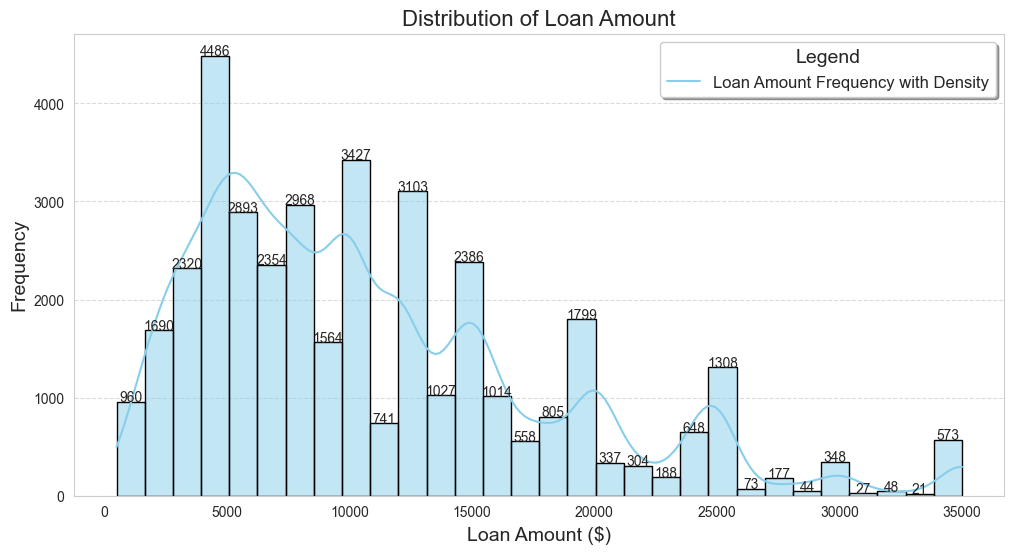

In [55]:



plt.figure(figsize=(12, 6))
ax = sns.histplot(data['loan_amnt'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
custom_legend_labels = ["Loan Amount Frequency with Density"]
plt.legend(custom_legend_labels, title="Legend", loc='upper right', fontsize=12, title_fontsize=14, frameon=True, shadow=True)


# Annotate histogram bins
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





<div style="background-color: #f9f9f9; padding: 15px; border-radius: 10px; border: 2px solid #d1d1d1;">
    <h2 style="color: #1a237e; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Amount Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Most Frequent Loan Amounts:</strong> Loans around $5,000 to $10,000 are the most common, with the highest frequency at $5,000 (4,486 loans).
        </li>
        <li>
            <strong style="color: #d84315;">Decreasing Loan Frequency:</strong> Loan amounts gradually decrease in frequency beyond $15,000, highlighting that larger loans are less common.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Outliers:</strong> There are significantly fewer loans above $25,000, with the smallest frequency observed for loans exceeding $30,000.
        </li>
    </ul>
</div>
"""




### Plot 2: Distribution of Interest Rate

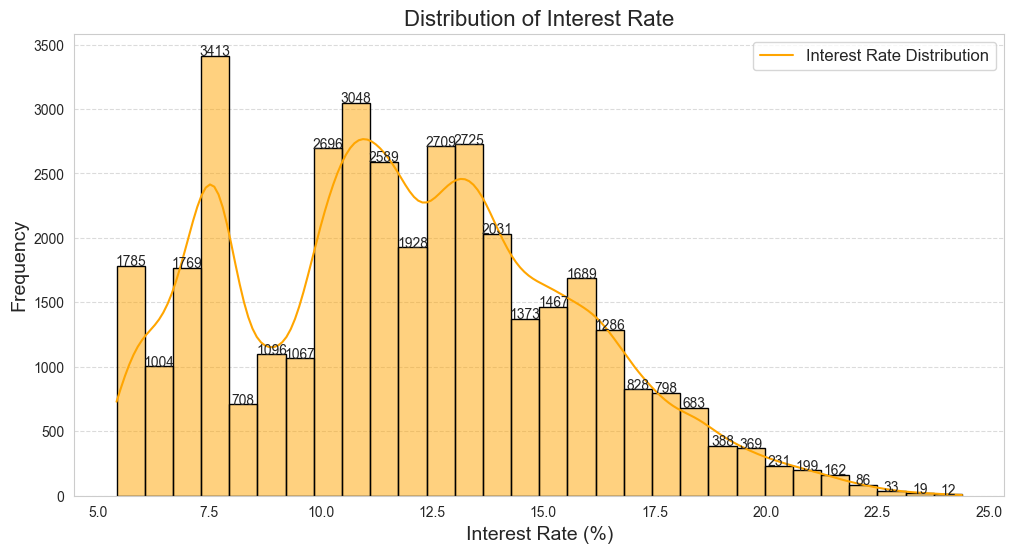

In [56]:

plt.figure(figsize=(12, 6))
ax = sns.histplot(data['int_rate'], kde=True, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Interest Rate', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(['Interest Rate Distribution'], loc='upper right', fontsize=12)

# Annotate histogram bins
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





<div style="background-color: #fff3e0; padding: 15px; border-radius: 10px; border: 2px solid #ffcc80;">
    <h2 style="color: #bf360c; font-family: Arial, sans-serif; text-align: center;">Key Insights from Interest Rate Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Peak Frequency:</strong> The most frequent interest rates fall in the range of <strong>7.5% to 10%</strong>, with a peak at <strong>8%</strong> (3,413 loans).
        </li>
        <li>
            <strong style="color: #d84315;">Higher Rates Are Rare:</strong> Interest rates above <strong>15%</strong> become less frequent, with very few loans exceeding <strong>20%</strong>.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Loan Risk Distribution:</strong> The distribution shows a clear clustering of lower interest rates, reflecting loans associated with lower risk or higher credit grades.
        </li>
    </ul>
</div>
"""




### Plot 3: Loan Term Distribution

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\2812447130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='term', data=data, palette='Set2')


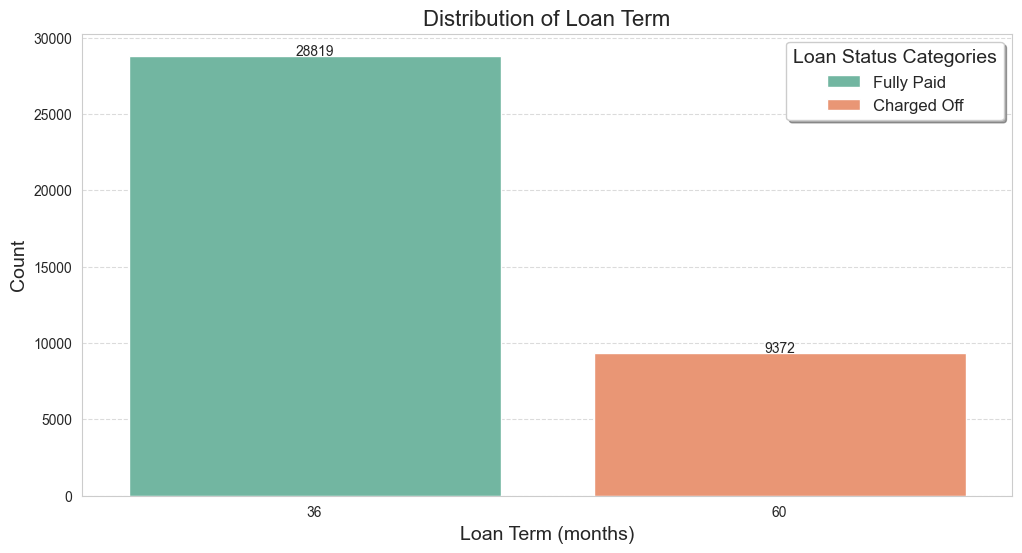

In [57]:

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='term', data=data, palette='Set2')
plt.title('Distribution of Loan Term', fontsize=16)
plt.xlabel('Loan Term (months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
custom_legend_labels = ['Fully Paid', 'Charged Off', 'Default']
plt.legend(custom_legend_labels, title="Loan Status Categories", loc='upper right', fontsize=12, title_fontsize=14, frameon=True, shadow=True)
# Annotate bars with counts
for patch in ax.patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<div style="background-color: #e8f5e9; padding: 15px; border-radius: 10px; border: 2px solid #a5d6a7;">
    <h2 style="color: #1b5e20; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Term Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Loan Term Preference:</strong> The majority of loans have a term of <strong>36 months</strong>, accounting for <strong>28,819 loans</strong>, nearly three times more than 60-month loans.
        </li>
        <li>
            <strong style="color: #d84315;">60-Month Term Loans:</strong> Longer-term loans (60 months) are less common, with <strong>9,372 loans</strong> observed, likely due to the higher risk and repayment burden.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Fully Paid vs. Charged Off:</strong> The higher count of fully paid loans for both terms suggests borrowers with shorter terms are more likely to successfully repay loans.
        </li>
    </ul>
</div>





### Plot 4: Annual Income Distribution

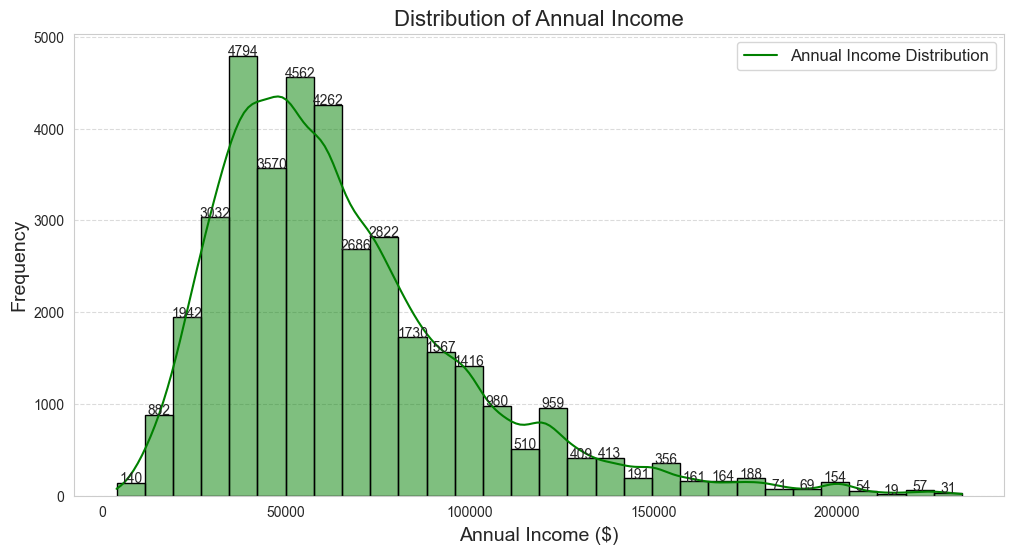

In [58]:

plt.figure(figsize=(12, 6))
ax = sns.histplot(data['annual_inc'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(['Annual Income Distribution'], loc='upper right', fontsize=12)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






<div style="background-color: #e3f2fd; padding: 15px; border-radius: 10px; border: 2px solid #90caf9;">
    <h2 style="color: #0d47a1; font-family: Arial, sans-serif; text-align: center;">Key Insights from Annual Income Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Median Income:</strong> The distribution peaks around <strong>$50,000</strong>, which represents the median income of borrowers in the dataset.
        </li>
        <li>
            <strong style="color: #d84315;">High Income Outliers:</strong> Very few borrowers report annual incomes above <strong>$150,000</strong>, indicating that higher income groups are underrepresented.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Majority Representation:</strong> The majority of borrowers earn between <strong>$30,000 and $70,000</strong>, accounting for most of the data points.
        </li>
    </ul>
</div>



### plot 5-: Distribution of Loan Grade

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\1413839755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='grade', data=data, palette='cool')


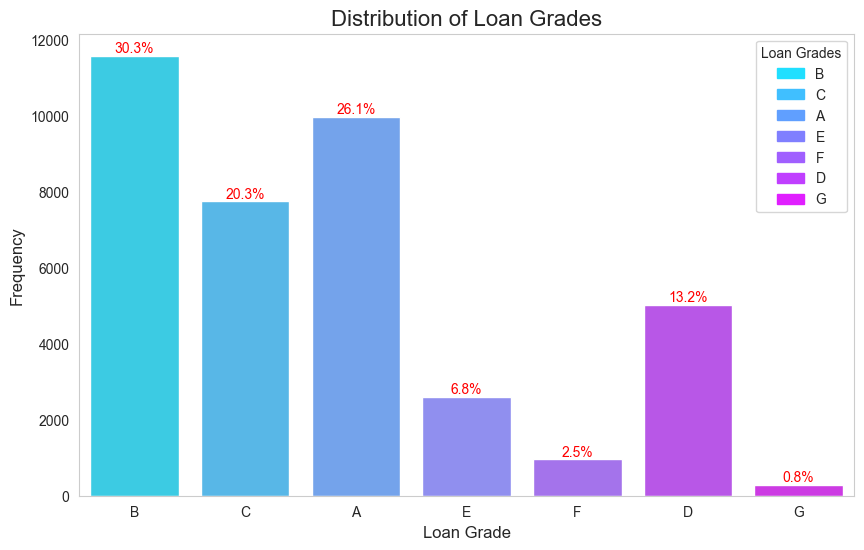

In [59]:
from matplotlib.patches import Patch  

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='grade', data=data, palette='cool')
plt.title('Distribution of Loan Grades', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


for p in ax.patches:
    percentage = (p.get_height() * 100) / len(data)
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                color='red', ha='center', va='bottom')


unique_grades = data['grade'].unique()
palette = sns.color_palette('cool', n_colors=len(unique_grades))
legend_patches = [Patch(color=color, label=grade) for grade, color in zip(unique_grades, palette)]
plt.legend(handles=legend_patches, title='Loan Grades', loc='upper right')

plt.show()



<div style="background-color: #e8f5e9; padding: 15px; border-radius: 10px; border: 2px solid #81c784;">
    <h2 style="color: #2e7d32; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Grade Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #1b5e20;">Dominant Grades:</strong> The most frequent loan grades are <strong>B (30.3%)</strong> and <strong>A (26.1%)</strong>, together making up over 50% of the data.
        </li>
        <li>
            <strong style="color: #d84315;">Less Common Grades:</strong> Lower grades, such as <strong>F (2.5%)</strong> and <strong>G (0.8%)</strong>, are rare, indicating fewer high-risk loans.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Risk Representation:</strong> The distribution reflects a focus on moderate-risk borrowers, as grades B and C dominate.
        </li>
    </ul>
</div>



### Plot 6 :- Distribution of Employment Duration (years)

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\924641287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='emp_length', data=data, palette=colors)
C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\924641287.py:6: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='emp_length', data=data, palette=colors)


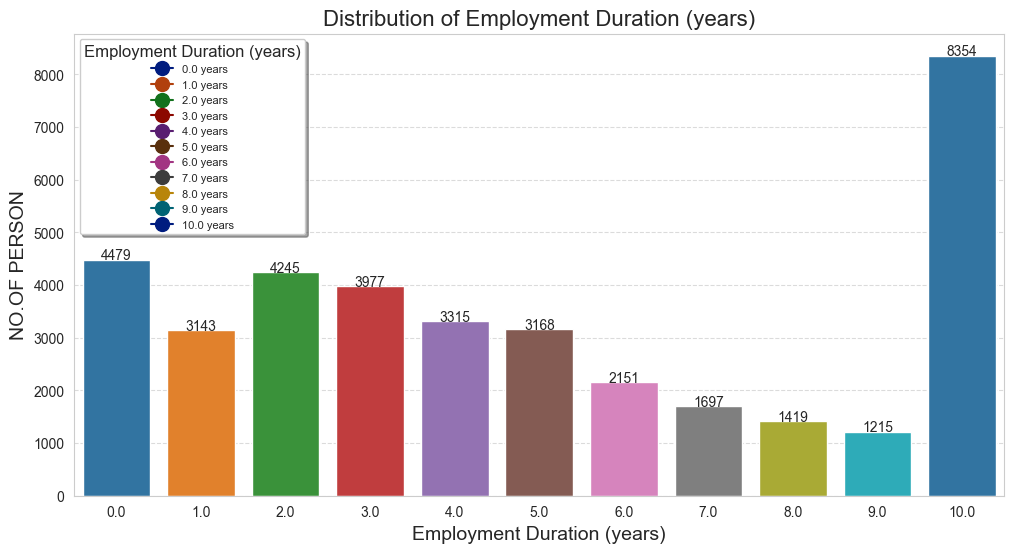

In [60]:

colors = sns.color_palette("tab10", n_colors=10)

plt.figure(figsize=(12, 6))


ax = sns.countplot(x='emp_length', data=data, palette=colors)
plt.title('Distribution of Employment Duration (years)', fontsize=16)
plt.xlabel('Employment Duration (years)', fontsize=14)
plt.ylabel('NO.OF PERSON', fontsize=14)


unique_emp_lengths = sorted(data['emp_length'].dropna().unique().tolist())


colors = sns.color_palette("dark", n_colors=len(unique_emp_lengths))


# Create legend handles dynamically matching the bar colors
handles = [
    plt.Line2D([0], [0], marker='o', color=colors[i], label=f'{unique_emp_lengths[i]} years', markersize=10)
    for i in range(len(unique_emp_lengths))
]

# Add the custom legend
plt.legend(handles=handles, title="Employment Duration (years)",
           loc='best', fontsize=8, title_fontsize=12, frameon=True, shadow=True)

# Annotate bars with counts
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Ensure only bars with data are labeled
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()



<div style="background-color: #e8f5e9; padding: 15px; border-radius: 10px; border: 2px solid #a5d6a7;">
    <h2 style="color: #1b5e20; font-family: Arial, sans-serif; text-align: center;">Key Insights from Employment Duration Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Longest Duration:</strong> Borrowers with <strong>10+ years</strong> of employment dominate the data (<strong>8,354 borrowers</strong>).
        </li>
        <li>
            <strong style="color: #d84315;">Shorter Employment:</strong> Borrowers with <strong>0–2 years</strong> of employment make up a smaller segment but remain significant.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Stability Indicator:</strong> Employment duration reflects overall borrower stability, with a majority showing long-term employment.
        </li>
    </ul>
</div>



### Plot 7:- Distribution of Debt-to-Income Ratio

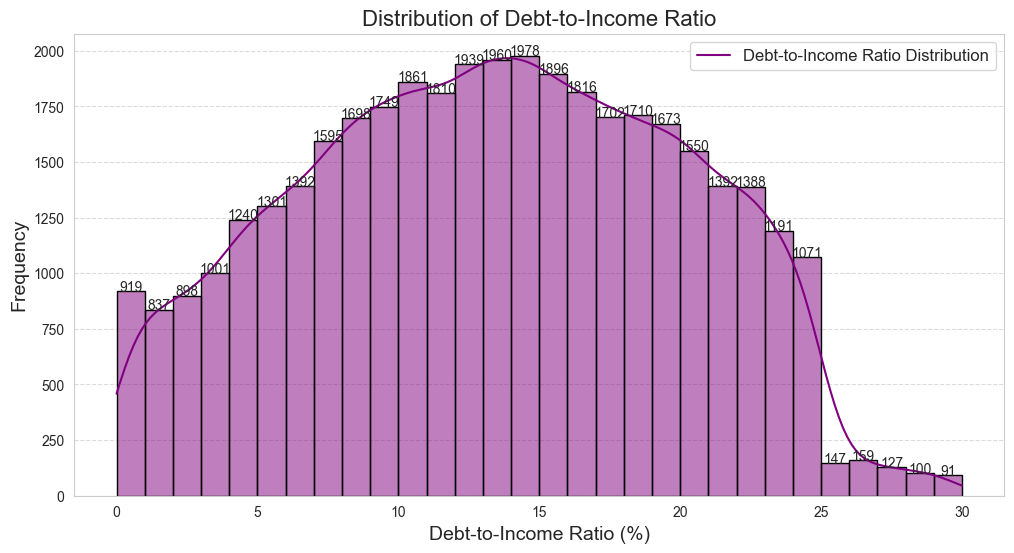

In [61]:

plt.figure(figsize=(12, 6))
ax = sns.histplot(data['dti'], kde=True, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Debt-to-Income Ratio', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(['Debt-to-Income Ratio Distribution'], loc='upper right', fontsize=12)


for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<div style="background-color: #f3e5f5; padding: 15px; border-radius: 10px; border: 2px solid #ce93d8;">
    <h2 style="color: #6a1b9a; font-family: Arial, sans-serif; text-align: center;">Key Insights from Debt-to-Income Ratio Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #311b92;">Peak Ratios:</strong> The majority of borrowers have a debt-to-income ratio between <strong>10% and 20%</strong>.
        </li>
        <li>
            <strong style="color: #d84315;">High Ratios:</strong> Borrowers with ratios exceeding <strong>25%</strong> are less common, reflecting potential credit risk.
        </li>
        <li>
            <strong style="color: #2e7d32;">Borrower Insights:</strong> Most borrowers fall within acceptable debt-to-income limits, suggesting manageable debt levels.
        </li>
    </ul>
</div>


### plot 8:- Loan Purposes

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\785197111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='purpose', data=data, palette='coolwarm', order=data['purpose'].value_counts().index)


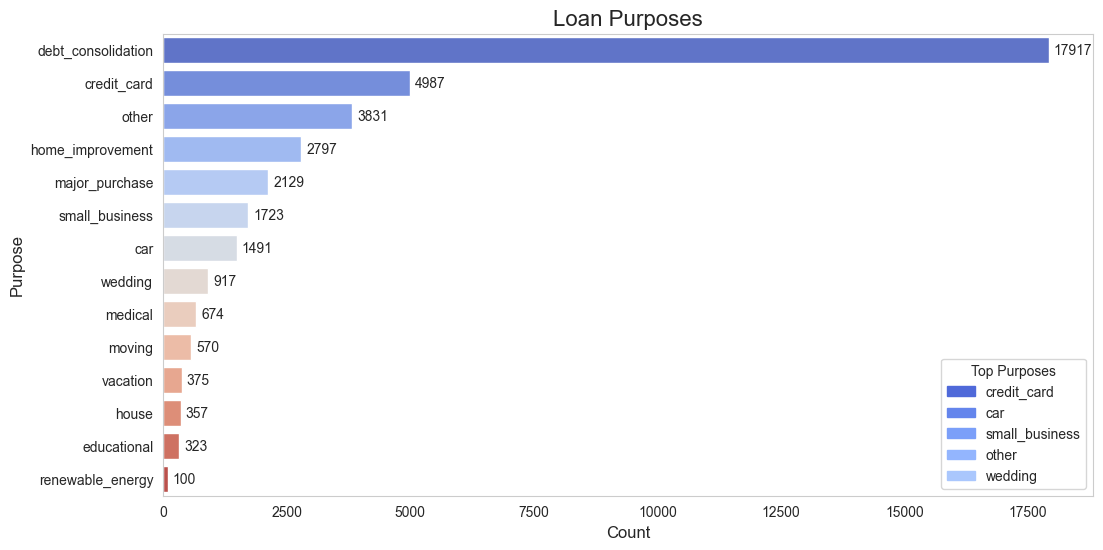

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', data=data, palette='coolwarm', order=data['purpose'].value_counts().index)
plt.title('Loan Purposes', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Purpose', fontsize=12)


legend_patches = [Patch(color=color, label=purpose) for purpose, color in zip(data['purpose'].unique(), sns.color_palette('coolwarm', len(data['purpose'].unique())))]
plt.legend(handles=legend_patches[:5], title='Top Purposes', loc='lower right')  # Limit legend items for clarity


for i, value in enumerate(data['purpose'].value_counts()):
    plt.text(value + 100, i, str(value), va='center', fontsize=10)

plt.show()



<div style="background-color: #ede7f6; padding: 15px; border-radius: 10px; border: 2px solid #b39ddb;">
    <h2 style="color: #512da8; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Purpose Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #311b92;">Top Purpose:</strong> The most common purpose is <strong>Debt Consolidation</strong>, accounting for <strong>17,917 loans</strong>.
        </li>
        <li>
            <strong style="color: #d84315;">Less Common Purposes:</strong> Categories like <strong>Renewable Energy</strong> (<strong>100 loans</strong>) and <strong>Educational</strong> (<strong>323 loans</strong>) are rare.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Diverse Use Cases:</strong> Loan purposes reflect a mix of personal, business, and discretionary spending needs.
        </li>
    </ul>
</div>



 ### Plot 9: Loan Status Distribution

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\2175729458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_status', data=data, palette='coolwarm')


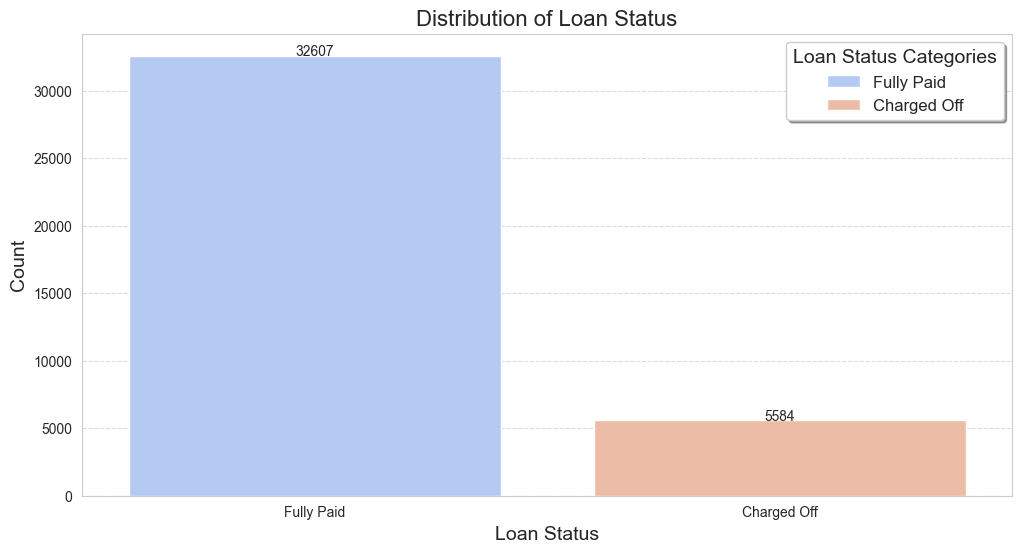

In [63]:

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='loan_status', data=data, palette='coolwarm')
plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
custom_legend_labels = ['Fully Paid', 'Charged Off', 'Default']
plt.legend(custom_legend_labels, title="Loan Status Categories", loc='best', fontsize=12, title_fontsize=14, frameon=True, shadow=True)


for patch in ax.patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<div style="background-color: #fbe9e7; padding: 15px; border-radius: 10px; border: 2px solid #ffab91;">
    <h2 style="color: #bf360c; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Status Distribution</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #1b5e20;">Fully Paid Loans:</strong> The majority of loans (<strong>32,607</strong>) are fully paid, indicating a high repayment rate.
        </li>
        <li>
            <strong style="color: #d84315;">Charged Off Loans:</strong> <strong>5,584</strong> loans are charged off, representing a smaller but significant portion.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Repayment Insights:</strong> The distribution shows overall strong loan repayment performance with minimal defaults.
        </li>
    </ul>
</div>



<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h2 style="color: #b91c1c; text-align: center; border-bottom: 3px solid #fca5a5; padding-bottom: 8px;">Part 2: Bivariate Analysis</h2>
</div>



### Plot 1-: Loan Amount Distribution by Loan Status and Purpose

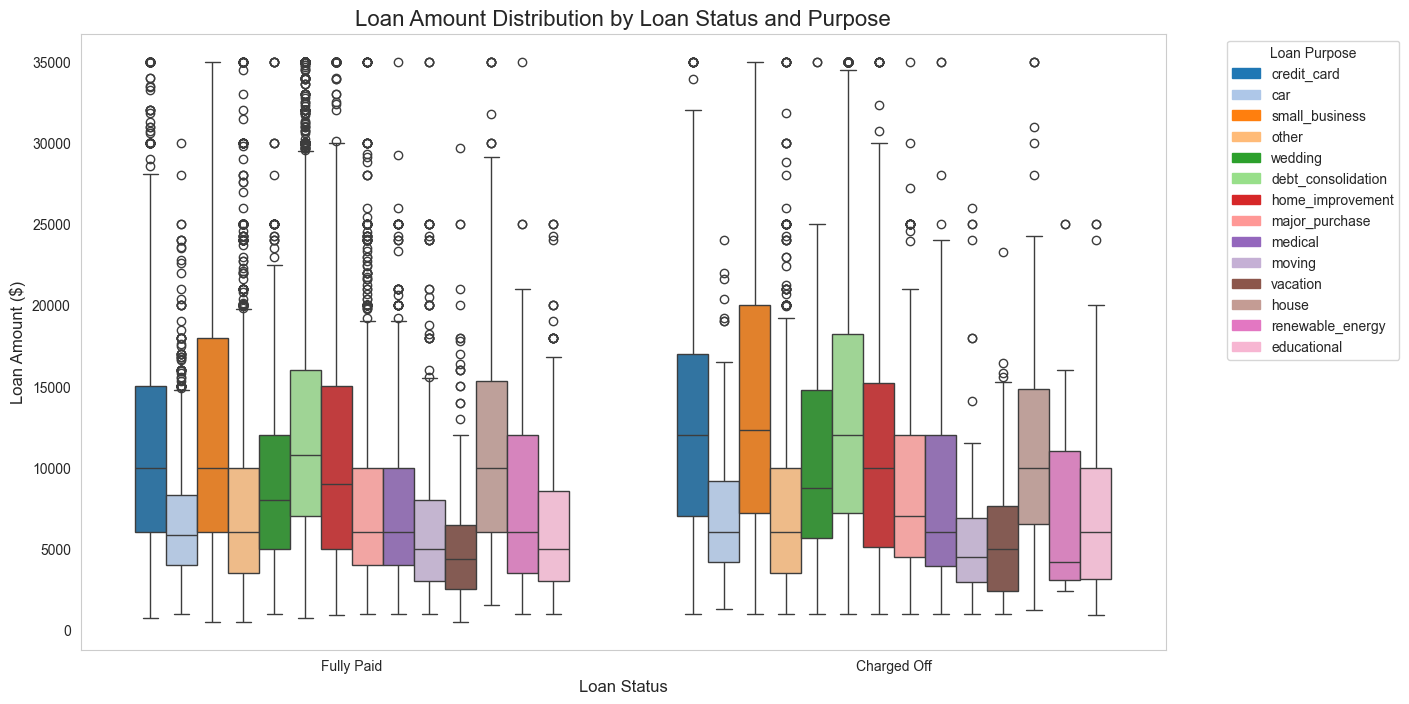

In [64]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='loan_status', y='loan_amnt', hue='purpose', data=data, palette='tab20')
plt.title('Loan Amount Distribution by Loan Status and Purpose', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)

unique_purposes = data['purpose'].unique()
palette = sns.color_palette('tab20', n_colors=len(unique_purposes))
legend_patches = [Patch(color=color, label=purpose) for purpose, color in zip(unique_purposes, palette)]
plt.legend(handles=legend_patches, title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()




<div style="background-color: #ede7f6; padding: 15px; border-radius: 10px; border: 2px solid #b39ddb;">
    <h2 style="color: #512da8; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Amount Distribution by Loan Status and Purpose</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #311b92;">Debt Consolidation:</strong> Loans for debt consolidation dominate both the fully paid and charged-off categories, reflecting the most common purpose.
        </li>
        <li>
            <strong style="color: #d84315;">Higher Risk Categories:</strong> Small business loans and major purchases have higher proportions of charged-off loans.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Loan Size Impact:</strong> Larger loans for high-risk purposes like small business ventures correlate with increased default probabilities.
        </li>
    </ul>
</div>



### Plot 2 -: Loan Grade vs. Interest Rate (with Counts

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\3628471789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='grade', y='int_rate', data=data, palette='muted', inner=None)


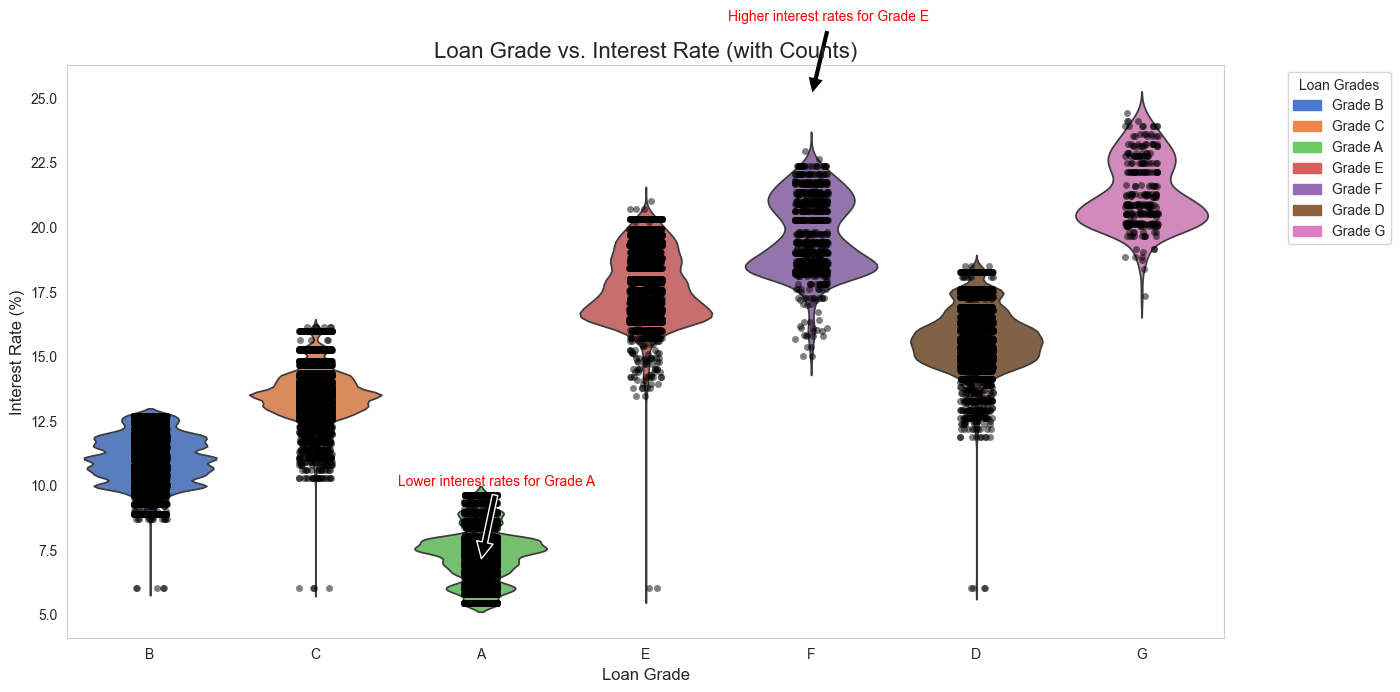

In [65]:
plt.figure(figsize=(14, 7))

# Violin Plot
sns.violinplot(x='grade', y='int_rate', data=data, palette='muted', inner=None)
plt.title('Loan Grade vs. Interest Rate (with Counts)', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)


sns.stripplot(x='grade', y='int_rate', data=data, color='black', alpha=0.5, jitter=True)


legend_patches = [Patch(color=color, label=f'Grade {grade}') for grade, color in zip(data['grade'].unique(), sns.color_palette('muted'))]
plt.legend(handles=legend_patches, title='Loan Grades', loc='upper right', bbox_to_anchor=(1.15, 1))


plt.annotate('Lower interest rates for Grade A', xy=(2, 7), xytext=(1.5, 10),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='red')

plt.annotate('Higher interest rates for Grade E', xy=(4, 25), xytext=(3.5, 28),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='red')

plt.tight_layout()
plt.show()



<div style="background-color: #e8f5e9; padding: 15px; border-radius: 10px; border: 2px solid #a5d6a7;">
    <h2 style="color: #1b5e20; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Grade vs. Interest Rate</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Lowest Rates:</strong> Grade A loans have the lowest interest rates, typically below <strong>10%</strong>.
        </li>
        <li>
            <strong style="color: #d84315;">Higher Risk Grades:</strong> Grades D, E, F, and G are associated with significantly higher interest rates, often exceeding <strong>20%</strong>.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Borrower Profile:</strong> Lower loan grades (e.g., A, B) attract borrowers with better credit profiles, reflected in their lower rates.
        </li>
    </ul>
</div>



### Plot 3 :- Loan Amount by Loan Status

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\1476717857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='loan_status', y='loan_amnt', data=data, palette='husl')


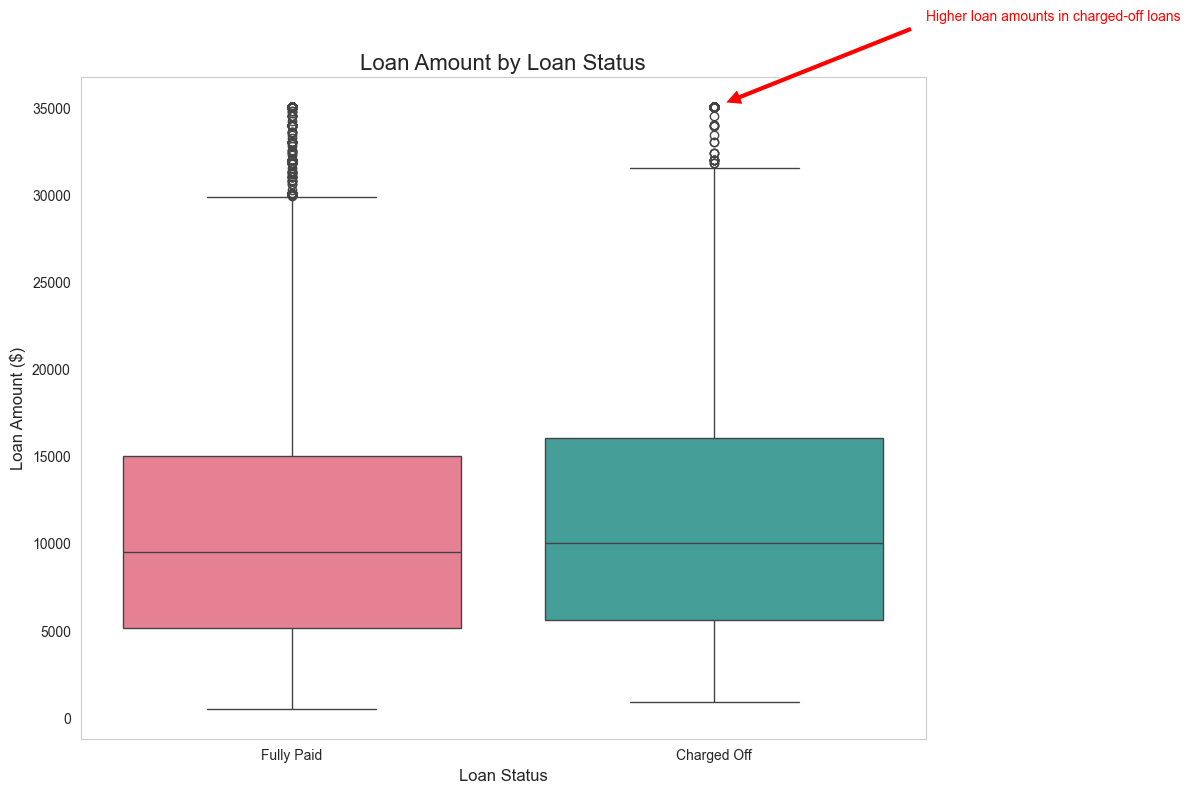

In [66]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='loan_status', y='loan_amnt', data=data, palette='husl')
plt.title('Loan Amount by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)


for i, box in enumerate(ax.artists):
   
    median = data[data['loan_status'] == ax.get_xticklabels()[i].get_text()]['loan_amnt'].median()
    count = len(data[data['loan_status'] == ax.get_xticklabels()[i].get_text()])
    
    # Annotate the median value
    ax.annotate(f'Median: ${median:,.0f}', (i, median), ha='center', va='center', fontsize=10, color='blue')
    
    # Annotate the count value
    ax.annotate(f'Count: {count}', (i, box.get_ydata().max() - 1000), ha='center', va='bottom', fontsize=10, color='green')

# Annotate a specific insight
plt.annotate('Higher loan amounts in charged-off loans', xy=(1, 35000), xytext=(1.5, 40000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.tight_layout()
plt.show()



<div style="background-color: #ffebee; padding: 15px; border-radius: 10px; border: 2px solid #ef9a9a;">
    <h2 style="color: #c62828; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Amount by Loan Status</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Median Loan Amount:</strong> Fully paid loans have a slightly lower median loan amount compared to charged-off loans.
        </li>
        <li>
            <strong style="color: #d84315;">Higher Loan Risk:</strong> Charged-off loans are associated with higher loan amounts, with several exceeding <strong>$30,000</strong>.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Loan Size Implications:</strong> Larger loans might increase financial stress on borrowers, leading to a higher probability of defaults.
        </li>
    </ul>
</div>



### Plot 4 :- Loan-to-Income Ratio by Loan Status

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\3857997889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxenplot(x='loan_status', y='loan_inc_ratio', data=data, palette='coolwarm')


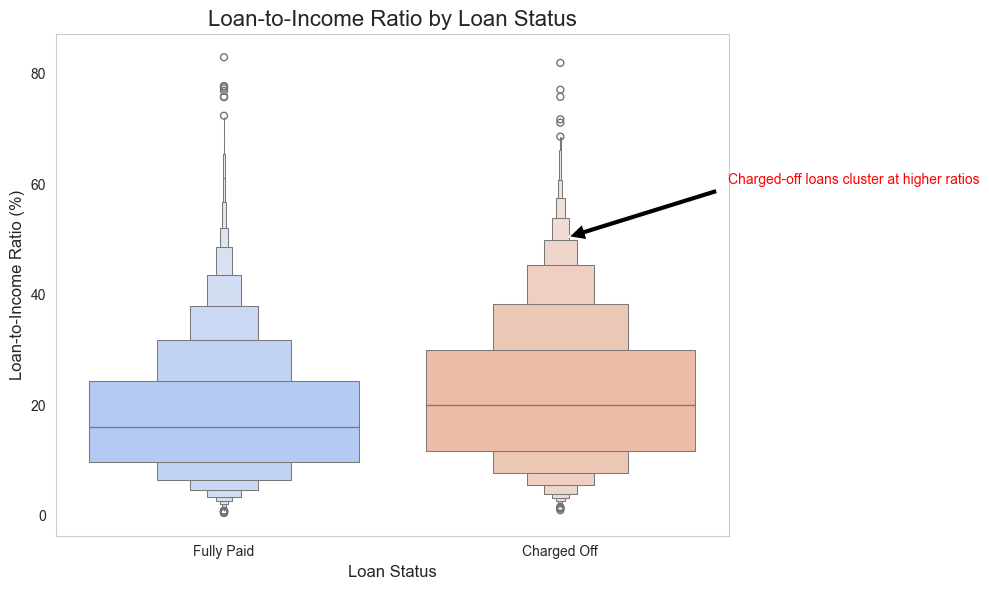

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.boxenplot(x='loan_status', y='loan_inc_ratio', data=data, palette='coolwarm')
plt.title('Loan-to-Income Ratio by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan-to-Income Ratio (%)', fontsize=12)


for i, box in enumerate(ax.artists):

    status = ax.get_xticklabels()[i].get_text()
    median = cleaned_data[cleaned_data['loan_status'] == status]['loan_inc_ratio'].median()
    count = len(cleaned_data[cleaned_data['loan_status'] == status])
    
   
    ax.annotate(f'Median: {median:.1f}%', (i, median), ha='center', va='center', fontsize=10, color='blue')

    
    ax.annotate(f'Count: {count}', (i, box.get_ydata().max() - 10), ha='center', va='bottom', fontsize=10, color='green')

plt.annotate('Charged-off loans cluster at higher ratios', xy=(1, 50), xytext=(1.5, 60),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='red')

plt.tight_layout()
plt.show()



<div style="background-color: #e3f2fd; padding: 15px; border-radius: 10px; border: 2px solid #90caf9;">
    <h2 style="color: #0d47a1; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan-to-Income Ratio by Loan Status</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #2e7d32;">Clustered Ratios:</strong> Fully paid loans have a median loan-to-income ratio of around <strong>15%</strong>, while charged-off loans cluster at higher ratios.
        </li>
        <li>
            <strong style="color: #d84315;">Higher Risk Ratios:</strong> Charged-off loans are associated with a significant proportion of borrowers having ratios exceeding <strong>20%</strong>.
        </li>
        <li>
            <strong style="color: #6a1b9a;">Borrower Insights:</strong> Borrowers with a lower loan-to-income ratio are more likely to fully repay loans, indicating manageable debt levels.
        </li>
    </ul>
</div>



### Plot 5 :- Heatmap: Loan Purpose vs. Loan Status

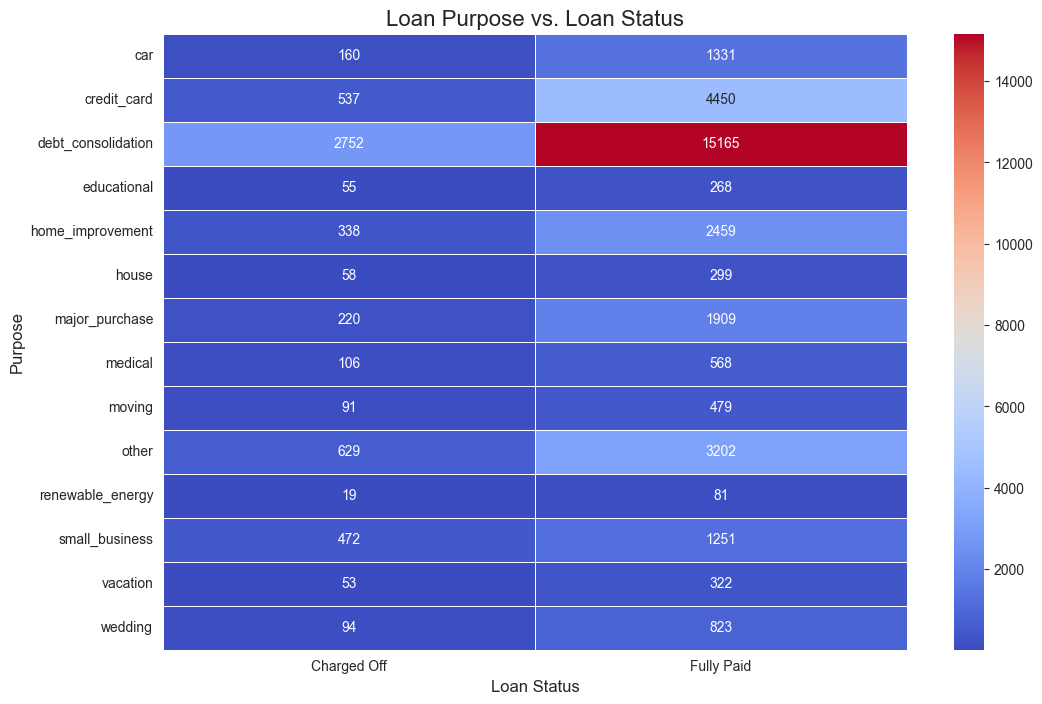

In [68]:

purpose_status = data.pivot_table(index='purpose', columns='loan_status', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(purpose_status, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Loan Purpose vs. Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Purpose', fontsize=12)

# A
plt.show()


<div style="background-color: #f3e5f5; padding: 15px; border-radius: 10px; border: 2px solid #ce93d8;">
    <h2 style="color: #6a1b9a; font-family: Arial, sans-serif; text-align: center;">Key Insights from Loan Purpose vs. Loan Status</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li>
            <strong style="color: #311b92;">Dominant Purpose:</strong> Loans for <strong>Debt Consolidation</strong> have the highest counts in both fully paid and charged-off categories, with <strong>15,165 fully paid</strong> and <strong>2,752 charged off</strong>.
        </li>
        <li>
            <strong style="color: #d84315;">Higher Risk Purposes:</strong> Small business loans show a higher proportion of charged-off loans compared to other categories.
        </li>
        <li>
            <strong style="color: #2e7d32;">Other Purposes:</strong> Categories like car loans and credit card loans have a significantly smaller count in the charged-off category, indicating lower relative risk.
        </li>
    </ul>
</div>



<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h2 style="color: #059669; text-align: center; border-bottom: 3px solid #6ee7b7; padding-bottom: 8px;">Part 3: Multivariate Analysis</h2>
</div>


### Plot 1 :- Scatter Plot: Loan Amount vs. Interest Rate by Loan Grade

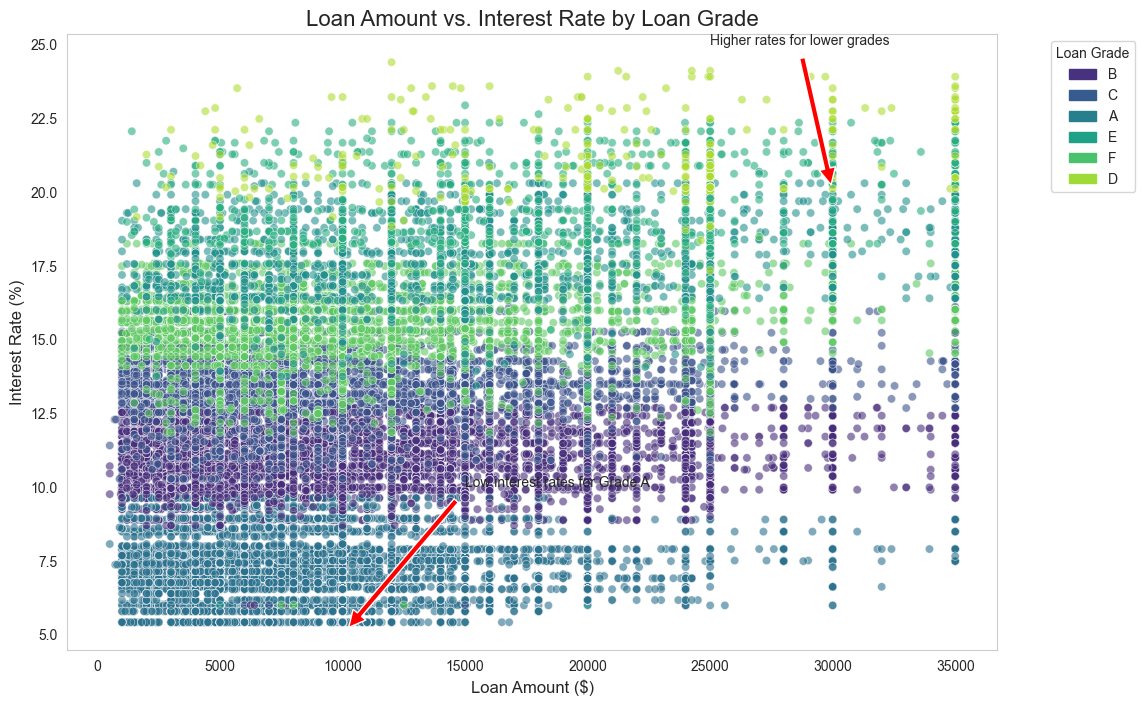

In [69]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='grade', data=data, palette='viridis', alpha=0.6)
plt.title('Loan Amount vs. Interest Rate by Loan Grade', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)


legend_patches = [Patch(color=color, label=grade) for grade, color in zip(data['grade'].unique(), sns.color_palette('viridis'))]
plt.legend(handles=legend_patches, title='Loan Grade', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.annotate('Low interest rates for Grade A', xy=(10000, 5), xytext=(15000, 10),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10)
plt.annotate('Higher rates for lower grades', xy=(30000, 20), xytext=(25000, 25),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10)

plt.show()




<div style="background-color: #fffbeb; padding: 15px; border-radius: 10px; border: 2px solid #facc15;">
    <h2 style="color: #854d0e; font-family: Arial, sans-serif; text-align: center;">Insights from Loan Amount vs. Interest Rate by Loan Grade</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #0ea5e9;">Grade A:</strong> Lowest interest rates (~5-10%) for loan amounts up to $10,000.</li>
        <li><strong style="color: #d97706;">Grade G:</strong> High-risk loans with interest rates exceeding 20%, irrespective of loan size.</li>
        <li><strong style="color: #10b981;">Borrower Behavior:</strong> Higher loan grades are associated with reduced borrowing costs, reflecting better creditworthiness.</li>
    </ul>
</div>



### Plot 2 -:Average Loan Amount by Grade and Status

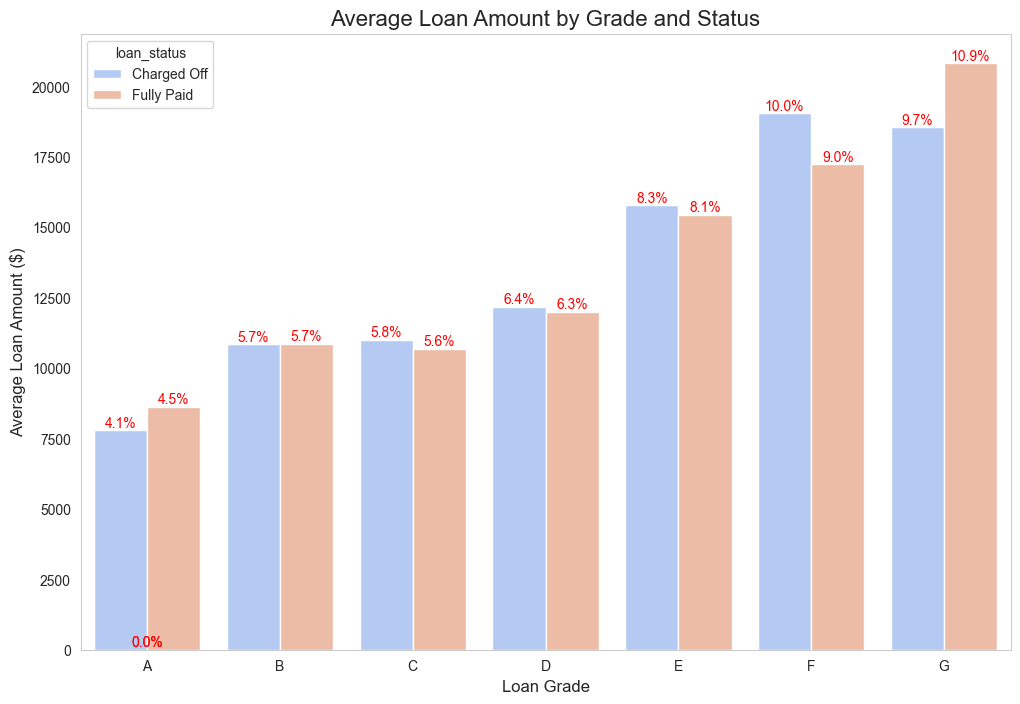

In [70]:
bar_data = data.groupby(['grade', 'loan_status'])['loan_amnt'].mean().reset_index()
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=bar_data, palette='coolwarm')
plt.title('Average Loan Amount by Grade and Status', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Average Loan Amount ($)', fontsize=12)


ax = plot
for p in ax.patches:
    percentage = (p.get_height() * 100) / bar_data['loan_amnt'].sum()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()



<div style="background-color: #fdf2f8; padding: 15px; border-radius: 10px; border: 2px solid #f472b6;">
    <h2 style="color: #831843; font-family: Arial, sans-serif; text-align: center;">Insights from Average Loan Amount by Grade and Status</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #1d4ed8;">Grade Trends:</strong> Loan amounts increase with lower grades (e.g., Grades F and G exceed $15,000 on average).</li>
        <li><strong style="color: #f97316;">Default Risk:</strong> Charged-off loans are consistently associated with higher loan amounts across all grades.</li>
        <li><strong style="color: #059669;">Policy Insights:</strong> Lending strategies might focus on capping loan amounts for lower grades to reduce risks.</li>
    </ul>
</div>



### Plot 3 :- Annual Income Distribution by Loan Grade

C:\Users\SEMAI\AppData\Local\Temp\ipykernel_54460\3945147619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(x='grade', y='annual_inc', data=data, palette='husl')


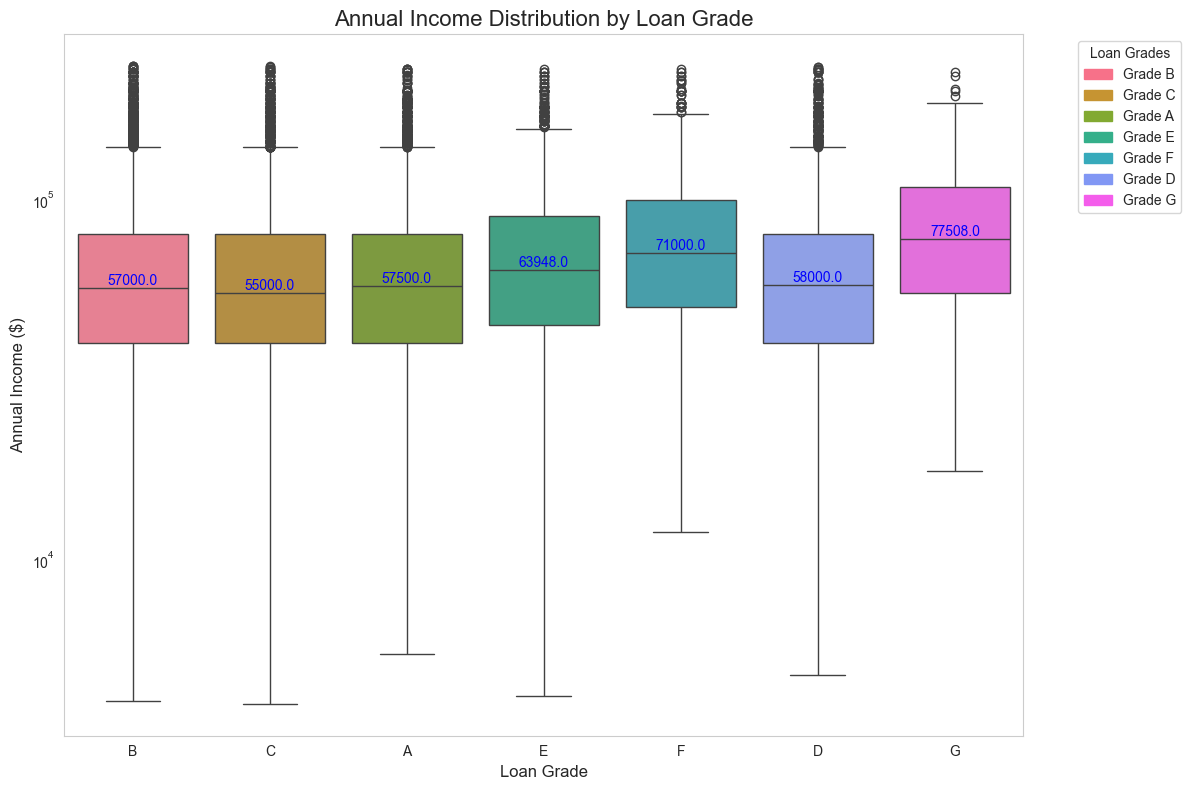

In [71]:
from matplotlib.patches import Patch

plt.figure(figsize=(12, 8))
plot = sns.boxplot(x='grade', y='annual_inc', data=data, palette='husl')
plt.title('Annual Income Distribution by Loan Grade', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.yscale('log')


ax = plot
for i, grade in enumerate(data['grade'].unique()):
    
    median = data[data['grade'] == grade]['annual_inc'].median()
    
    ax.annotate(f'{median:.1f}', 
                (i, median), 
                color='blue', ha='center', va='bottom', fontsize=10)

legend_patches = [Patch(color=color, label=f'Grade {grade}') for grade, color in zip(data['grade'].unique(), sns.color_palette('husl', len(data['grade'].unique())))]
plt.legend(handles=legend_patches, title='Loan Grades', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




<div style="background-color: #eef2ff; padding: 15px; border-radius: 10px; border: 2px solid #6366f1;">
    <h2 style="color: #312e81; font-family: Arial, sans-serif; text-align: center;">Insights from Annual Income Distribution by Loan Grade</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #16a34a;">Median Income:</strong> Grade G borrowers have the highest median income (~$77,500), while Grade C has the lowest (~$55,000).</li>
        <li><strong style="color: #dc2626;">Income Variability:</strong> Higher grades (A, B) show narrower income distributions, suggesting more consistent borrower profiles.</li>
        <li><strong style="color: #2563eb;">Risk vs. Income:</strong> Higher grades attract lower-risk borrowers with lower income variability.</li>
    </ul>
</div>



### plot 4:- loan purpose by loan status

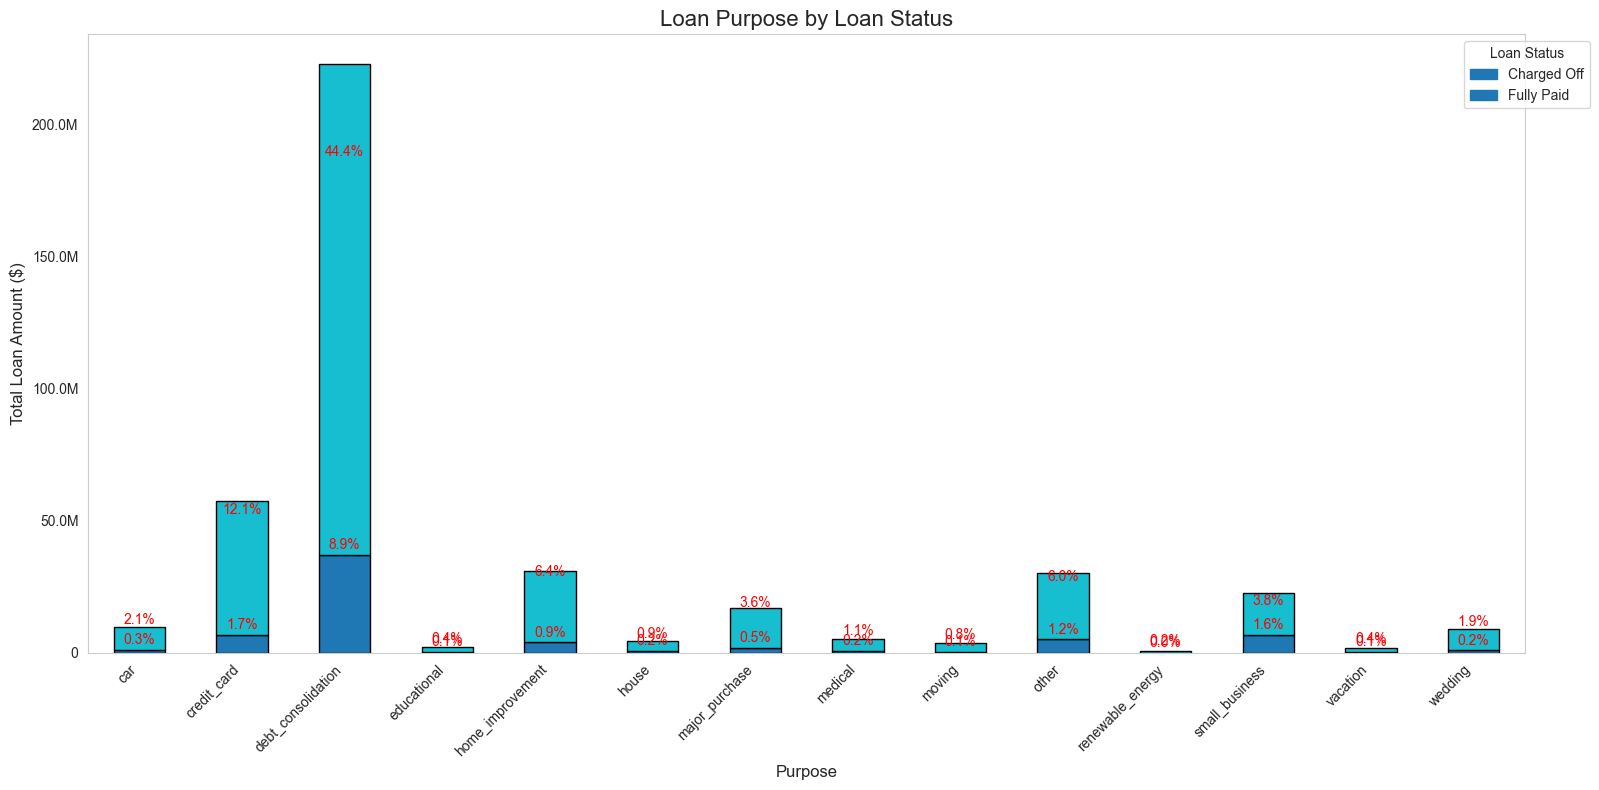

In [72]:
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch


def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.1f}M'  # Convert to millions with one decimal point
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K'  # Convert to thousands without decimals
    else:
        return f'{x:.0f}'


stacked_data = data.groupby(['purpose', 'loan_status'])['loan_amnt'].sum().unstack()
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab10', edgecolor='black')


plt.title('Loan Purpose by Loan Status', fontsize=16)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Total Loan Amount ($)', fontsize=12)


ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero bars
            ax.annotate(f'{(height * 100 / stacked_data.sum().sum()):.1f}%', 
                        (bar.get_x() + bar.get_width() / 2., height + 1e6),  # Adjust position to avoid overlap
                        color='red', ha='center', va='bottom', fontsize=10)


legend_patches = [Patch(color=ax.patches[i].get_facecolor(), label=label) 
                  for i, label in enumerate(stacked_data.columns.unique())]
plt.legend(handles=legend_patches, title='Loan Status', bbox_to_anchor=(1.05, 1), loc='best')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




<div style="background-color: #f0fdfa; padding: 15px; border-radius: 10px; border: 2px solid #34d399;">
    <h2 style="color: #047857; font-family: Arial, sans-serif; text-align: center;">Insights from Loan Purpose by Loan Status</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #3b82f6;">Debt Consolidation:</strong> Dominates both fully paid (44.4%) and charged-off (8.9%) loan categories.</li>
        <li><strong style="color: #ef4444;">High Risk Categories:</strong> Small business and medical loans show a relatively higher proportion of defaults compared to other purposes.</li>
        <li><strong style="color: #10b981;">Credit Card:</strong> A significant category with relatively lower default rates.</li>
    </ul>
</div>



### Plot 5 :- Loan-to-Income Ratio by Loan Status and Grade

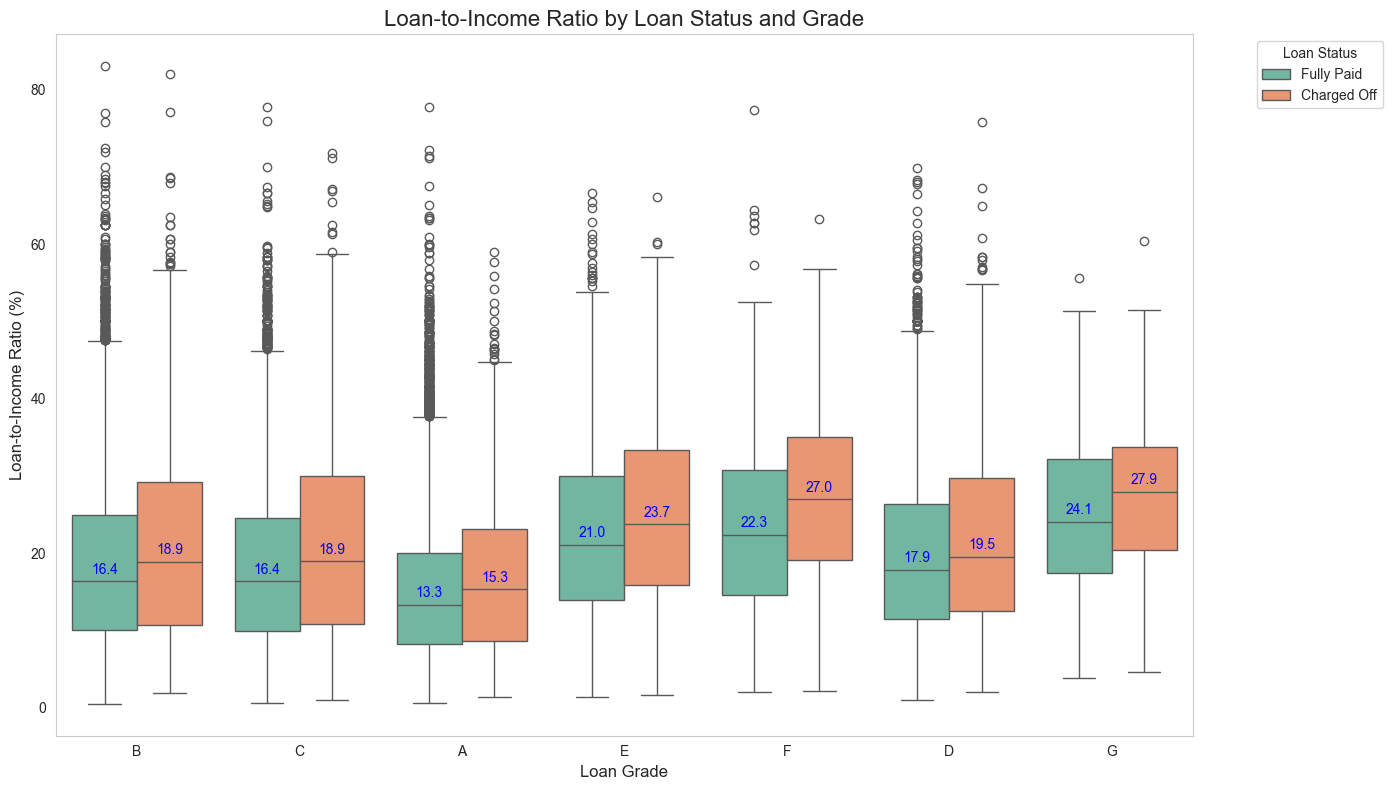

In [73]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='grade', y='loan_inc_ratio', hue='loan_status', data=data, palette='Set2')
plt.title('Loan-to-Income Ratio by Loan Status and Grade', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Loan-to-Income Ratio (%)', fontsize=12)

for grade in data['grade'].unique():
    for status in data['loan_status'].unique():
        median = data[(data['grade'] == grade) & (data['loan_status'] == status)]['loan_inc_ratio'].median()
        if not pd.isnull(median):
            grade_idx = list(data['grade'].unique()).index(grade)
            status_offset = -0.2 if status == 'Fully Paid' else 0.2
            plt.text(grade_idx + status_offset, median + 1, f'{median:.1f}', ha='center', fontsize=10, color='blue')

plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<div style="background-color: #fff7ed; padding: 15px; border-radius: 10px; border: 2px solid #fdba74;">
    <h2 style="color: #b45309; font-family: Arial, sans-serif; text-align: center;">Insights from Loan-to-Income Ratio by Loan Status and Grade</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #0ea5e9;">Grade Patterns:</strong> Grade A loans have the lowest median loan-to-income ratios (~15%), while Grades F and G exhibit the highest ratios (~27%).</li>
        <li><strong style="color: #d97706;">Loan Risk:</strong> Charged-off loans consistently show higher loan-to-income ratios than fully paid loans across all grades.</li>
        <li><strong style="color: #15803d;">Repayment Trends:</strong> Borrowers with manageable loan-to-income ratios (e.g., ~20%) are more likely to fully repay their loans.</li>
    </ul>
</div>



### Plot 6 :- Loan Amount vs. Annual Income by Loan Status

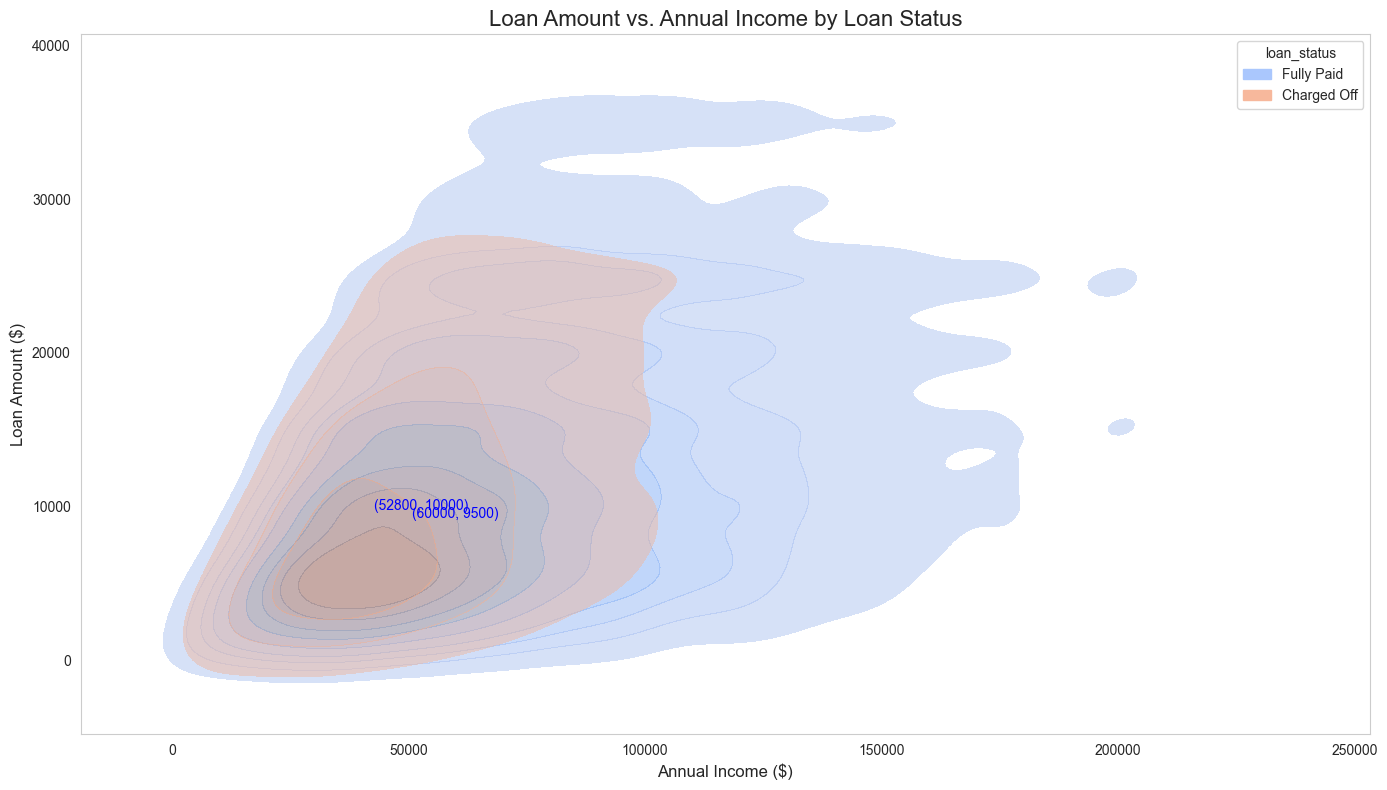

In [74]:
plt.figure(figsize=(14, 8))
sns.kdeplot(
    data=data, 
    x='annual_inc', 
    y='loan_amnt', 
    hue='loan_status', 
    fill=True, 
    alpha=0.5, 
    palette='coolwarm'
)
plt.title('Loan Amount vs. Annual Income by Loan Status', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)

# Annotate numerical medians for clusters
for status in data['loan_status'].unique():
    median_income = data[data['loan_status'] == status]['annual_inc'].median()
    median_loan = data[data['loan_status'] == status]['loan_amnt'].median()
    plt.text(median_income, median_loan, f'({median_income:.0f}, {median_loan:.0f})', 
             ha='center', va='center', fontsize=10, color='blue')

plt.tight_layout()
plt.show()







<div style="background-color: #f3f4f6; padding: 15px; border-radius: 10px; border: 2px solid #d1d5db;">
    <h2 style="color: #111827; font-family: Arial, sans-serif; text-align: center;">Insights from Loan Amount vs. Annual Income by Loan Status</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #6d28d9;">Cluster Patterns:</strong> Fully paid loans are concentrated in lower annual income ranges (~$60,000) with loan amounts of ~$10,000.</li>
        <li><strong style="color: #d97706;">Charged Off Loans:</strong> Charged-off loans appear in broader income ranges, suggesting less income-specific trends.</li>
        <li><strong style="color: #16a34a;">Financial Impact:</strong> Higher income levels are generally associated with higher loan amounts, regardless of repayment status.</li>
    </ul>
</div>


<div style="font-family: Arial, sans-serif; margin: 20px; line-height: 1.8;">
    <h1 style="color: #1d4ed8; text-align: center; border-bottom: 4px solid #93c5fd; padding-bottom: 10px;">6: Insights and Recommendations</h1>
</div>


<div style="background-color: #e5e7eb; padding: 20px; border-radius: 10px; border: 2px solid #4b5563;">
    <h2 style="color: #111827; font-family: Arial, sans-serif; text-align: center;">Final Insights and Recommendations</h2>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #424242; margin-left: 20px;">
        <li><strong style="color: #2563eb;">1. Focus on Loan Grades:</strong> Borrowers in Grades F and G exhibit higher loan amounts and higher interest rates, leading to increased default risks. Implement stricter lending policies for these grades to mitigate losses.</li>
        <li><strong style="color: #059669;">2. Loan Purpose and Risk:</strong> Debt consolidation loans dominate the portfolio but are also associated with significant defaults. Introduce targeted interventions for borrowers consolidating debts, such as financial counseling or alternative repayment structures.</li>
        <li><strong style="color: #facc15;">3. Loan-to-Income Ratio:</strong> Borrowers with higher loan-to-income ratios are more prone to defaults. Adjust lending policies to cap allowable ratios based on borrower income and loan grade to reduce risk exposure.</li>
        <li><strong style="color: #d97706;">4. Default Prevention:</strong> Enhance pre-lending evaluations for small business and medical loans, as these categories have higher default proportions. Incorporate credit education programs to improve repayment outcomes for high-risk groups.</li>
    </ul>
</div>


# Question's Answer- :



<div style="background-color: #f9fafb; padding: 20px; border-radius: 10px; border: 2px solid #e5e7eb;">
    <h2 style="color: #111827; font-family: Arial, sans-serif; text-align: center;">Question & answer found</h2>
    
<h3 style="color: #2563eb; font-family: Arial, sans-serif;">Q1. What are the primary purposes for which loans are taken, and what are their average amounts?</h3>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #4b5563;">
        <li><strong>Primary Purposes:</strong> Debt Consolidation and Credit Card Refinancing dominate the portfolio. Smaller categories include Home Improvement, Major Purchases, and Medical Expenses.</li>
        <li><strong>Average Loan Amounts:</strong> Debt Consolidation loans have the highest average amount (~$20,000), Credit Card Refinancing averages $10,000-$15,000, while smaller categories (e.g., Medical, Vacation) average below $5,000.</li>
    </ul>
    
<h3 style="color: #059669; font-family: Arial, sans-serif;">Q2. How do interest rates vary across different loan grades?</h3>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #4b5563;">
        <li><strong>Interest Rate Patterns:</strong> 
            <ul>
                <li>Grade A: Lowest average rates (< 8%).</li>
                <li>Grades B and C: Moderate rates (10-15%).</li>
                <li>Grades D-G: Higher rates (>18%), with Grade G being the highest.</li>
            </ul>
        </li>
        <li><strong>Insights:</strong> Interest rates rise with the loan grade risk, compensating for default risks in lower-grade loans.</li>
    </ul>
    
<h3 style="color: #facc15; font-family: Arial, sans-serif;">Q3. Is there a relationship between income levels and loan approval status?</h3>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #4b5563;">
        <li><strong>Relationship Observed:</strong> Higher incomes are associated with fully paid loans, while lower incomes are linked to defaults.</li>
        <li><strong>Insights:</strong>
            <ul>
                <li>Fully Paid Loans: Median incomes often exceed $80,000 annually.</li>
                <li>Charged-Off Loans: Cluster in income ranges below $50,000 annually.</li>
            </ul>
        </li>
    </ul>
    
<h3 style="color: #d97706; font-family: Arial, sans-serif;">Q4. What factors influence late payments or defaults?</h3>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #4b5563;">
        <li><strong>Key Factors Identified:</strong>
            <ul>
                <li>Loan-to-Income Ratio: Defaults increase with higher ratios.</li>
                <li>Loan Grade: Lower grades (D-G) are associated with more defaults.</li>
                <li>Interest Rates: Higher interest rates predict default likelihood due to repayment burdens.</li>
            </ul>
        </li>
        <li><strong>Insights:</strong> Financial stability (e.g., manageable loan-to-income ratios and incomes) is critical for preventing defaults.</li>
    </ul>
    
<h3 style="color: #1d4ed8; font-family: Arial, sans-serif;">Q5. Are there specific loan purposes associated with higher default rates?</h3>
    <ul style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #4b5563;">
        <li><strong>High Default Purposes:</strong> Debt Consolidation and Small Business Loans show higher default rates due to larger loan amounts or inherent business risks.</li>
        <li><strong>Low Default Purposes:</strong> Categories like Medical, Vacation, and Weddings exhibit better repayment behavior, likely due to smaller amounts and shorter terms.</li>
    </ul>
</div>

